/var/folders/yy/xl5jyrln4lddx85rv3db9s_r0000gn/T/ipykernel_66933/2267481959.py:20: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), label='Cluster')


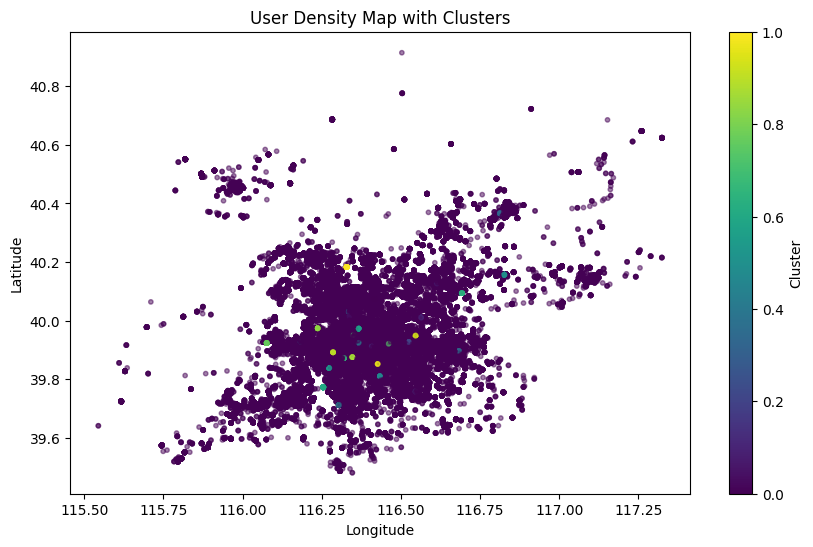

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# 读取数据集的一个子集
data_sample = pd.read_csv('cleaned_xinlin.csv', nrows=100000)  # 只读取前100000行

# 数据预处理
data_sample['Timestamp'] = pd.to_datetime(data_sample['Timestamp'])
data_sample['Longitude'] = data_sample['Longitude'].astype(float)
data_sample['Latitude'] = data_sample['Latitude'].astype(float)

# 使用DBSCAN算法来识别不同密度的区域，优化参数
db = DBSCAN(eps=0.001, min_samples=100).fit(data_sample[['Longitude', 'Latitude']])
data_sample['Cluster'] = db.labels_

# 绘制用户密度图
plt.figure(figsize=(10, 6))
plt.scatter(data_sample['Longitude'], data_sample['Latitude'], c=data_sample['Cluster'], s=10, cmap='viridis', alpha=0.5)
plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), label='Cluster')
plt.title('User Density Map with Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

/var/folders/yy/xl5jyrln4lddx85rv3db9s_r0000gn/T/ipykernel_1297/672800327.py:20: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), label='Cluster')


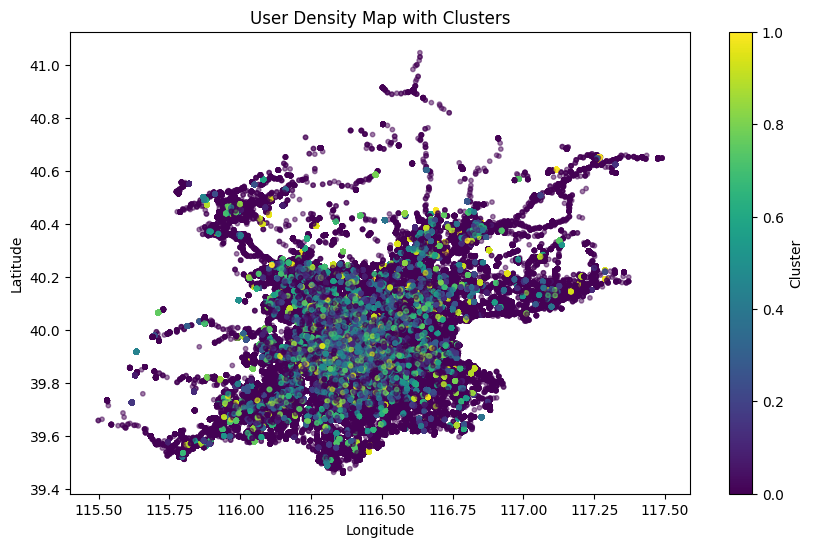

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN


data = pd.read_csv('cleaned_xinlin.csv') 

# 数据预处理
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Longitude'] = data['Longitude'].astype(float)
data['Latitude'] = data['Latitude'].astype(float)

# 使用DBSCAN算法来识别不同密度的区域，优化参数
db = DBSCAN(eps=0.001, min_samples=100).fit(data[['Longitude', 'Latitude']])
data['Cluster'] = db.labels_

# 绘制用户密度图
plt.figure(figsize=(10, 6))
plt.scatter(data['Longitude'], data['Latitude'], c=data['Cluster'], s=10, cmap='viridis', alpha=0.5)
plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), label='Cluster')
plt.title('User Density Map with Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

/Users/sunqian/anaconda3/envs/cyfm/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
/var/folders/yy/xl5jyrln4lddx85rv3db9s_r0000gn/T/ipykernel_65309/4252785599.py:23: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), label='Cluster')


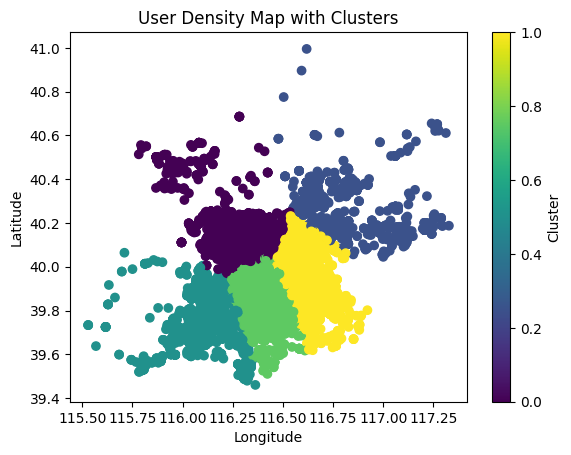

In [31]:
import dask.dataframe as dd
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt

# 使用 Dask 读取数据
ddf = dd.read_csv('cleaned_xinlin.csv')

# 数据预处理

ddf['Longitude'] = ddf['Longitude'].astype(float)
ddf['Latitude'] = ddf['Latitude'].astype(float)

# 由于 Dask DataFrame 是懒加载的，我们需要触发计算来获取数据
# 这里我们只取一部分数据用于聚类，以避免内存问题
data_sample = ddf.sample(frac=0.01).compute()

# 使用 MiniBatchKMeans 进行聚类
mbkmeans = MiniBatchKMeans(n_clusters=5, random_state=0)
data_sample['Cluster'] = mbkmeans.fit_predict(data_sample[['Longitude', 'Latitude']])

# 可视化聚类结果
plt.scatter(data_sample['Longitude'], data_sample['Latitude'], c=data_sample['Cluster'], cmap='viridis')
plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), label='Cluster')
plt.title('User Density Map with Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [32]:
print(ddf.head())

   IMSI            Timestamp   Longitude   Latitude        Date      Time
0  4406  2024-04-07 23:47:46  116.254753  39.887227  2024-04-07  23:47:46
1   134  2024-04-07 23:47:47  116.294670  39.857790  2024-04-07  23:47:47
2  1316  2024-04-07 23:47:51  116.281807  39.948059  2024-04-07  23:47:51
3  4453  2024-04-07 23:47:54  116.185365  39.921688  2024-04-07  23:47:54
4  1842  2024-04-07 23:47:55  116.336388  39.790555  2024-04-07  23:47:55


In [15]:
type(ddf)

pandas.core.frame.DataFrame

In [34]:
import folium

# 计算数据的中心点作为地图的初始位置
center_point = [data_sample['Latitude'].mean(), data_sample['Longitude'].mean()]
map = folium.Map(location=center_point, zoom_start=12)  # 缩放级别根据需要调整

In [35]:
# 假设你已经有一个聚类结果 'Cluster' 列
unique_clusters = data_sample['Cluster'].unique()

# 为每个簇添加一个标记
for cluster in unique_clusters:
    cluster_data = data_sample[data_sample['Cluster'] == cluster]
    folium.CircleMarker(
        location=[cluster_data['Latitude'].mean(), cluster_data['Longitude'].mean()],
        radius=10,  # 可以根据簇的大小调整半径
        color='blue',  # 可以根据簇的不同选择不同的颜色
        fill=True,
        fill_color='blue',  # 可以根据簇的不同选择不同的填充颜色
        fill_opacity=0.6
    ).add_to(map)

In [36]:
map

In [37]:
map.save('map.html')

In [39]:
map.save('map2.html')

In [44]:
import folium
import numpy as np
import matplotlib.pyplot as plt

# 计算数据的中心点作为地图的初始位置
center_point = [data_sample['Latitude'].mean(), data_sample['Longitude'].mean()]
map = folium.Map(location=center_point, zoom_start=12)

# 假设你已经有一个聚类结果 'Cluster' 列
unique_clusters = np.unique(data_sample['Cluster'])

# 创建颜色映射，为每个簇分配不同的颜色
color_map = plt.cm.get_cmap('viridis', len(unique_clusters))
colors = color_map(np.linspace(0, 1, len(unique_clusters)))[:, :3]  # 取 RGB 值

# 为每个簇添加一个标记
for cluster in unique_clusters:  # 确保这里遍历的是簇的唯一值
    cluster_data = data_sample[data_sample['Cluster'] == cluster]
    # 计算簇的中心点
    lat = cluster_data['Latitude'].mean()
    lon = cluster_data['Longitude'].mean()
    # 根据簇的人口密度调整半径
    radius = int(np.sqrt(cluster_data.shape[0]) * 2)  # 你可以根据实际情况调整这个比例因子
    
    # 为每个簇选择一个颜色
    cluster_color = colors[np.mod(cluster, len(colors))].tolist()

    folium.CircleMarker(
        location=[lat, lon],
        radius=radius,
        color='white',
        fill=True,
        fill_color=cluster_color,
        fill_opacity=0.6
    ).add_to(map)

# 显示地图
map

/var/folders/yy/xl5jyrln4lddx85rv3db9s_r0000gn/T/ipykernel_65309/4036716133.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis', len(unique_clusters))


In [45]:
map.save('map2.html')

In [1]:
import pandas as pd

# 加载数据
data = pd.read_csv('cleaned_xinlin.csv')



   IMSI            Timestamp   Longitude   Latitude        Date      Time
0  4406  2024-04-07 23:47:46  116.254753  39.887227  2024-04-07  23:47:46
1   134  2024-04-07 23:47:47  116.294670  39.857790  2024-04-07  23:47:47
2  1316  2024-04-07 23:47:51  116.281807  39.948059  2024-04-07  23:47:51
3  4453  2024-04-07 23:47:54  116.185365  39.921688  2024-04-07  23:47:54
4  1842  2024-04-07 23:47:55  116.336388  39.790555  2024-04-07  23:47:55


In [9]:
# 查看数据集的前几行
print(data.head())

   IMSI           Timestamp   Longitude   Latitude        Date      Time  \
0  4406 2024-04-07 23:47:46  116.254753  39.887227  2024-04-07  23:47:46   
1   134 2024-04-07 23:47:47  116.294670  39.857790  2024-04-07  23:47:47   
2  1316 2024-04-07 23:47:51  116.281807  39.948059  2024-04-07  23:47:51   
3  4453 2024-04-07 23:47:54  116.185365  39.921688  2024-04-07  23:47:54   
4  1842 2024-04-07 23:47:55  116.336388  39.790555  2024-04-07  23:47:55   

   Cluster  
0        0  
1        1  
2       -1  
3       -1  
4        2  


In [53]:
# 获取数据的描述性统计
print(data.describe())

# 查看 IMSI 的唯一数量，了解有多少不同的用户
print(f"Number of unique IMSIs: {data['IMSI'].nunique()}")

               IMSI     Longitude      Latitude
count  2.160431e+06  2.160431e+06  2.160431e+06
mean   5.015280e+03  1.164014e+02  3.995824e+01
std    2.886745e+03  1.900931e-01  1.605660e-01
min    1.000000e+00  1.154990e+02  3.946003e+01
25%    2.515000e+03  1.162983e+02  3.986884e+01
50%    5.016000e+03  1.163830e+02  3.993386e+01
75%    7.536000e+03  1.164977e+02  4.004071e+01
max    1.000000e+04  1.174895e+02  4.104545e+01
Number of unique IMSIs: 9999


Time range: 2024-04-07 23:47:46 to 2024-04-08 23:54:57


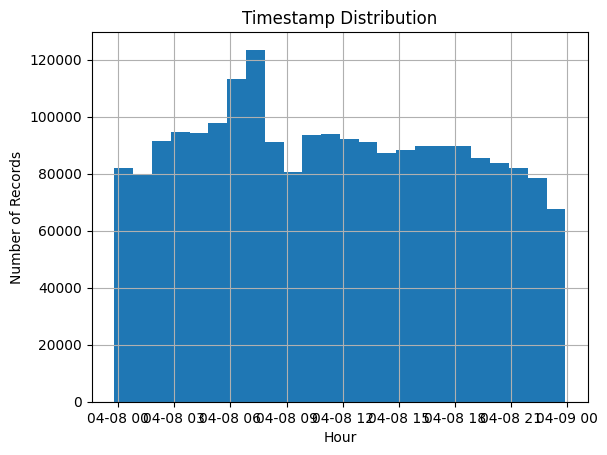

Hour
6     116396
7     115887
5      98882
4      94044
3      93910
11     93356
10     93318
2      92740
12     91535
13     90280
8      89990
17     89307
16     89161
18     89083
15     88156
14     86603
0      84819
19     84729
20     83015
9      81850
21     81451
1      79708
22     77782
23     74429
Name: count, dtype: int64


In [10]:
# 将 Timestamp 列转换为 datetime 类型
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# 分析数据集中的时间范围
print(f"Time range: {data['Timestamp'].min()} to {data['Timestamp'].max()}")

# 可视化时间分布
data['Timestamp'].hist(bins=24)  # 24 hours
plt.title('Timestamp Distribution')
plt.xlabel('Hour')
plt.ylabel('Number of Records')
plt.show()

# 提取小时数，以便分析每小时的活动
data['Hour'] = data['Timestamp'].dt.hour
print(data['Hour'].value_counts())

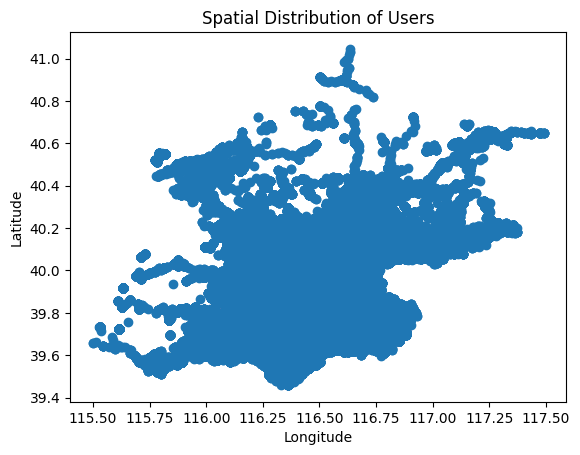

In [55]:
# 可视化地理位置分布
import matplotlib.pyplot as plt

plt.scatter(data['Longitude'], data['Latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Distribution of Users')
plt.show()

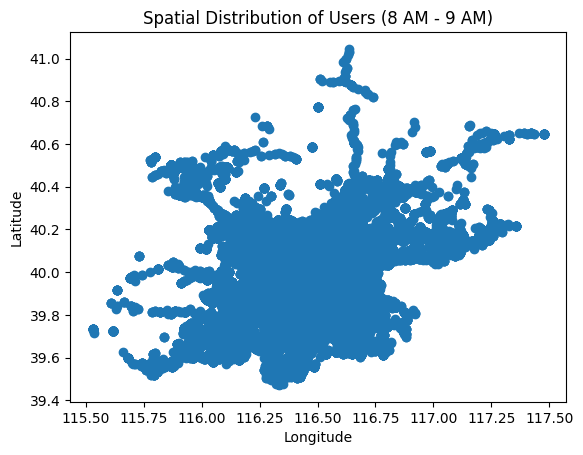

In [56]:
# 创建一个新的列，包含日期和小时
data['Date_Time'] = data['Timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')

                 #!!待分析不同时间段的变化
# 分析特定时间段内的用户活动
# 例如，分析早上8点到9点的用户活动
morning_data = data[data['Hour'].between(8, 9)]
plt.scatter(morning_data['Longitude'], morning_data['Latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Distribution of Users (8 AM - 9 AM)')
plt.show()

/Users/sunqian/anaconda3/envs/cyfm/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster
0    904551
1    505643
3    383365
2    199605
4    167267
Name: count, dtype: int64


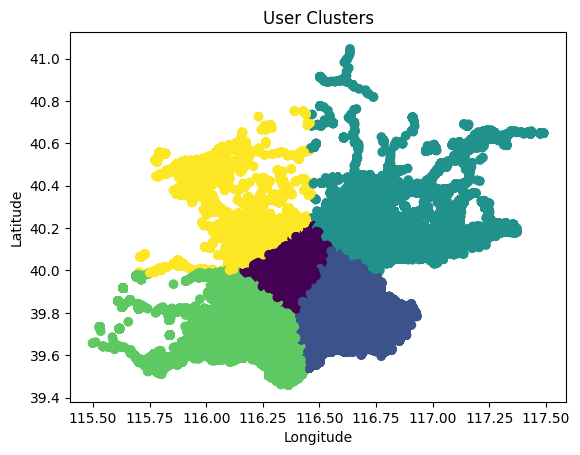

In [57]:
from sklearn.cluster import KMeans

# 选择经度和纬度进行聚类
kmeans = KMeans(n_clusters=5)  # 假设我们想要找到5个聚类中心
data['Cluster'] = kmeans.fit_predict(data[['Longitude', 'Latitude']])

# 查看聚类结果
print(data['Cluster'].value_counts())

# 可视化聚类结果
plt.scatter(data['Longitude'], data['Latitude'], c=data['Cluster'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('User Clusters')
plt.show()

In [7]:
#3、特征工程
#1）特征提取--日期和时间特征
data['Hour'] = data['Timestamp'].dt.hour
data['DayOfWeek'] = data['Timestamp'].dt.dayofweek
data['IsWeekend'] = data['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)


In [8]:
#2） 特征构造---计算每个用户的活动次数。
user_activity = data.groupby('IMSI').size()


In [9]:
#2） 特征构造---计算特定地点或区域的访问频率
location_visits = data.groupby(['Longitude', 'Latitude']).size()

In [10]:
#3）特征转换--对 Longitude 和 Latitude 进行归一化或标准化，以消除不同量纲的影响
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['Longitude', 'Latitude']] = scaler.fit_transform(data[['Longitude', 'Latitude']])


In [11]:
#4）特征转换--分箱（Binning）
data['TimeOfDay'] = pd.cut(data['Hour'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])

In [12]:
#4）特征编码---独热编码（One-Hot Encoding）
data = pd.get_dummies(data, columns=['IMSI'])

In [13]:
#4）特征编码---标签编码
data['DayOfWeek'] = data['DayOfWeek'].astype('category').cat.codes

In [15]:
import numpy as np

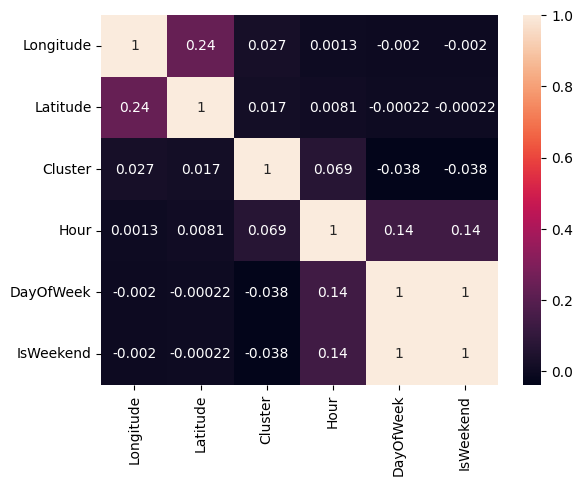

In [16]:
#5）特征选择---相关性分析
#要首先选择数值型列

# 选择数值型列
numerical_cols = data.select_dtypes(include=[np.number]).columns

# 计算相关性矩阵
correlation_matrix = data[numerical_cols].corr()

# 可视化相关性矩阵
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [66]:
print(data.head())

            Timestamp  Longitude  Latitude        Date      Time  Hour  \
0 2024-04-07 23:47:46  -0.771613 -0.442271  2024-04-07  23:47:46    23   
1 2024-04-07 23:47:47  -0.561626 -0.625604  2024-04-07  23:47:47    23   
2 2024-04-07 23:47:51  -0.629293 -0.063411  2024-04-07  23:47:51    23   
3 2024-04-07 23:47:54  -1.136634 -0.227649  2024-04-07  23:47:54    23   
4 2024-04-07 23:47:55  -0.342165 -1.044341  2024-04-07  23:47:55    23   

             Date_Time  Cluster  DayOfWeek  IsWeekend  ... IMSI_9991  \
0  2024-04-07 23:47:46        3          1          1  ...     False   
1  2024-04-07 23:47:47        3          1          1  ...     False   
2  2024-04-07 23:47:51        0          1          1  ...     False   
3  2024-04-07 23:47:54        3          1          1  ...     False   
4  2024-04-07 23:47:55        3          1          1  ...     False   

   IMSI_9992  IMSI_9993  IMSI_9994  IMSI_9995  IMSI_9996  IMSI_9997  \
0      False      False      False      False      

In [17]:
#6）交互特征----组合两个或多个特征来创建交互项。

data['Is_Weekend_Evening'] = data['IsWeekend'] * (data['Hour'] >= 17)

In [2]:
#7）空间数据的特征工程
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import geohash
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [19]:
print(data.head())

            Timestamp  Longitude  Latitude        Date      Time  Cluster  \
0 2024-04-07 23:47:46  -0.771613 -0.442271  2024-04-07  23:47:46        0   
1 2024-04-07 23:47:47  -0.561626 -0.625604  2024-04-07  23:47:47        1   
2 2024-04-07 23:47:51  -0.629293 -0.063411  2024-04-07  23:47:51       -1   
3 2024-04-07 23:47:54  -1.136634 -0.227649  2024-04-07  23:47:54       -1   
4 2024-04-07 23:47:55  -0.342165 -1.044341  2024-04-07  23:47:55        2   

   Hour  DayOfWeek  IsWeekend TimeOfDay  ...  IMSI_9992  IMSI_9993  IMSI_9994  \
0    23          1          1   Evening  ...      False      False      False   
1    23          1          1   Evening  ...      False      False      False   
2    23          1          1   Evening  ...      False      False      False   
3    23          1          1   Evening  ...      False      False      False   
4    23          1          1   Evening  ...      False      False      False   

   IMSI_9995  IMSI_9996  IMSI_9997  IMSI_9998  IMS

In [3]:
# 假设 data 是包含 'Longitude' 和 'Latitude' 列的 DataFrame
# 将经纬度转换为 Shapely 点对象
geometry = [Point(xy) for xy in zip(data['Longitude'], data['Latitude'])]


In [4]:
# 创建 GeoDataFrame
gdf = gpd.GeoDataFrame(data, geometry=geometry)

In [5]:
# 网格化（Geohashing）
gdf['Geohash'] = gdf.apply(lambda row: geohash.encode(row['Latitude'], row['Longitude'], precision=12), axis=1)

In [6]:
# 地点访问频率
location_frequency = data.groupby('IMSI').size()

In [ ]:
"""
特征变量描述

 时间特征变量
1. 小时（Hour）：从时间戳中提取的小时信息。
2. 星期几（DayOfWeek）：从时间戳中提取的星期信息。
3. 是否为周末（IsWeekend）：基于星期信息，标识是否为周六或周日。
4. 日期（Date）：时间戳的日期部分，可用于分析特定日期的用户行为。

 空间特征变量
1. Geohash：基于经纬度的地理位置编码系统，用于表示地理位置的精度。
2. 网格化（Gridding）：将地理位置划分为固定大小的网格。
3. 用户聚集区域（Cluster）：使用聚类算法（如 K-means 或 DBSCAN）识别的用户聚集区域。

 用户行为特征变量
1. 用户活跃度（User Activity）：每个用户的活动次数或信令记录数。
2. 访问频率（Visit Frequency）：用户访问特定地点的频率。
3. 移动速度（Movement Speed）：基于用户位置变化和时间间隔计算的速度。

 组合特征变量
1. 时间-空间特征（Time-Space Features）：结合时间和空间信息的特征，例如特定时间段内用户在特定地点的活动。
2. 方向性移动（Directional Movement）：用户移动的方向，如从北到南或从西到东。

 派生特征变量
1. 地点类别（Location Category）：基于地理位置信息推断的地点类型，如住宅区、商业区等。
2. 空间自相关（Spatial Autocorrelation）：地点与其周围地点的相似性。
3. 空间依赖性（Spatial Dependency）：一个地点的特征如何受到邻近地点特征的影响。


这些特征变量可以根据你的具体分析目标和数据集的特点进行调整和优化。特征工程是一个迭代的过程，可能需要多次尝试和验证才能找到最有效的特征集。



"""

In [23]:
# 加载数据集
df= pd.read_csv('cleaned_xinlin.csv')

In [21]:
print(data.head())

            Timestamp  Longitude  Latitude        Date      Time  Cluster  \
0 2024-04-07 23:47:46  -0.771613 -0.442271  2024-04-07  23:47:46        0   
1 2024-04-07 23:47:47  -0.561626 -0.625604  2024-04-07  23:47:47        1   
2 2024-04-07 23:47:51  -0.629293 -0.063411  2024-04-07  23:47:51       -1   
3 2024-04-07 23:47:54  -1.136634 -0.227649  2024-04-07  23:47:54       -1   
4 2024-04-07 23:47:55  -0.342165 -1.044341  2024-04-07  23:47:55        2   

   Hour  DayOfWeek  IsWeekend TimeOfDay  ...  IMSI_9992  IMSI_9993  IMSI_9994  \
0    23          1          1   Evening  ...      False      False      False   
1    23          1          1   Evening  ...      False      False      False   
2    23          1          1   Evening  ...      False      False      False   
3    23          1          1   Evening  ...      False      False      False   
4    23          1          1   Evening  ...      False      False      False   

   IMSI_9995  IMSI_9996  IMSI_9997  IMSI_9998  IMS

In [35]:
##方向性移动角
import pandas as pd
import numpy as np

# 将经纬度转换为弧度
def radians(degrees):
    return degrees * (np.pi / 180.0)

# 计算两点之间的方位角
def calculate_bearing(lat1, lon1, lat2, lon2):
    # 将经纬度转换为弧度
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    
    # 计算经纬度差
    delta_lon = lon2 - lon1
    
    # 计算方位角
    x = np.sin(delta_lon) * np.cos(lat2)
    y = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(delta_lon)
    
    bearing = np.degrees(np.arctan2(x, y))  # 转换为度
    return (bearing + 360) % 360  # 调整方位角范围为0-360度

# 假设 df 是你的 DataFrame，它包含 'IMSI', 'Timestamp', 'Longitude', 'Latitude' 列

# 按 'IMSI' 和 'Timestamp' 对数据进行排序
df = df.sort_values(by=['IMSI', 'Timestamp'])

# 使用 .shift() 方法获取前一行的数据
df['prev_Longitude'] = df['Longitude'].shift(1)
df['prev_Latitude'] = df['Latitude'].shift(1)

# 过滤掉由于 .shift() 操作而变成 NaN 的行
df = df.dropna(subset=['prev_Longitude', 'prev_Latitude'])

# 计算方位角
df['Bearing'] = df.apply(
    lambda row: calculate_bearing(
        row['prev_Latitude'], row['prev_Longitude'],
        row['Latitude'], row['Longitude']
    ), axis=1
)

# 现在 df 包含了每个用户每个时间点的方位角

In [39]:
print(df.head())

        IMSI           Timestamp   Longitude   Latitude        Date      Time  \
247434     1 2024-04-08 02:44:57  116.630642  40.341083  2024-04-08  02:44:57   
247728     1 2024-04-08 02:45:07  116.630642  40.341083  2024-04-08  02:45:07   
315793     1 2024-04-08 03:28:34  116.630642  40.341083  2024-04-08  03:28:34   
393964     1 2024-04-08 04:18:44  116.630642  40.341083  2024-04-08  04:18:44   
472620     1 2024-04-08 05:08:45  116.630642  40.341083  2024-04-08  05:08:45   

        prev_Longitude  prev_Latitude  Bearing      prev_Timestamp  \
247434      116.630642      40.341083      0.0 2024-04-08 02:38:43   
247728      116.630642      40.341083      0.0 2024-04-08 02:44:57   
315793      116.630642      40.341083      0.0 2024-04-08 02:45:07   
393964      116.630642      40.341083      0.0 2024-04-08 03:28:34   
472620      116.630642      40.341083      0.0 2024-04-08 04:18:44   

            Time_Delta  Time_Delta_Seconds  Speed  
247434 0 days 00:06:14               374

In [27]:
! pip install geopy.vector  -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
ERROR: Could not find a version that satisfies the requirement geopy.vector (from versions: none)
ERROR: No matching distribution found for geopy.vector


In [38]:
import pandas as pd

# 假设 df 是你的 DataFrame，包含 'IMSI', 'Timestamp', 'Longitude', 'Latitude' 列

# 确保 Timestamp 列是 datetime 类型
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# 按 'IMSI' 和 'Timestamp' 对数据进行排序
df = df.sort_values(by=['IMSI', 'Timestamp'])

# 使用 .shift() 方法获取前一行的数据
df['prev_Longitude'] = df['Longitude'].shift(1)
df['prev_Latitude'] = df['Latitude'].shift(1)
df['prev_Timestamp'] = df['Timestamp'].shift(1)

# 过滤掉由于 .shift() 操作而变成 NaN 的行
df = df.dropna(subset=['prev_Longitude', 'prev_Latitude', 'prev_Timestamp'])

# 计算时间差（秒）
df['Time_Delta_Seconds'] = (df['Timestamp'] - df['prev_Timestamp']).dt.total_seconds()

# 计算移动速度（米/秒）
df['Speed'] = df.apply(
    lambda row: calculate_distance(row['prev_Latitude'], row['prev_Longitude'], row['Latitude'], row['Longitude']) / row['Time_Delta_Seconds'] if row['Time_Delta_Seconds'] > 0 else 0,
    axis=1
)

# 定义 calculate_distance 函数来计算两点之间的距离（单位：米）
def calculate_distance(lat1, lon1, lat2, lon2):
    from geopy.distance import geodesic
    return geodesic((lat1, lon1), (lat2, lon2)).meters

# 现在 df 包含了每个用户每个时间点的移动速度

In [40]:
print(df.head())

        IMSI           Timestamp   Longitude   Latitude        Date      Time  \
247434     1 2024-04-08 02:44:57  116.630642  40.341083  2024-04-08  02:44:57   
247728     1 2024-04-08 02:45:07  116.630642  40.341083  2024-04-08  02:45:07   
315793     1 2024-04-08 03:28:34  116.630642  40.341083  2024-04-08  03:28:34   
393964     1 2024-04-08 04:18:44  116.630642  40.341083  2024-04-08  04:18:44   
472620     1 2024-04-08 05:08:45  116.630642  40.341083  2024-04-08  05:08:45   

        prev_Longitude  prev_Latitude  Bearing      prev_Timestamp  \
247434      116.630642      40.341083      0.0 2024-04-08 02:38:43   
247728      116.630642      40.341083      0.0 2024-04-08 02:44:57   
315793      116.630642      40.341083      0.0 2024-04-08 02:45:07   
393964      116.630642      40.341083      0.0 2024-04-08 03:28:34   
472620      116.630642      40.341083      0.0 2024-04-08 04:18:44   

            Time_Delta  Time_Delta_Seconds  Speed  
247434 0 days 00:06:14               374

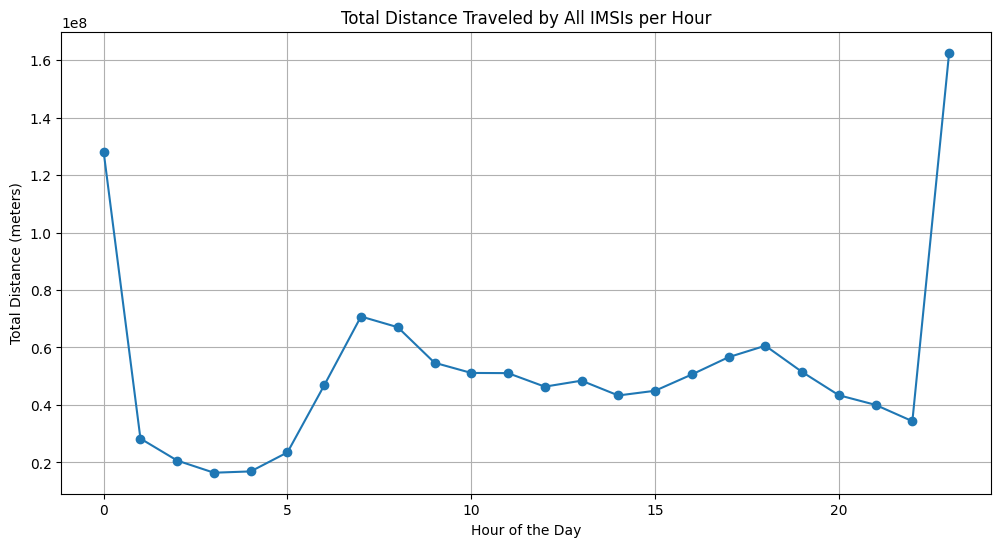

In [41]:
#每个小时所有"IMSI"对应移动距离总和做折线图

import pandas as pd
import matplotlib.pyplot as plt
from geopy.distance import geodesic

# 假设 df 是你的 DataFrame，包含 'IMSI', 'Timestamp', 'Longitude', 'Latitude' 列

# 确保 Timestamp 列是 datetime 类型
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# 按 'IMSI' 和 'Timestamp' 对数据进行排序
df = df.sort_values(by=['IMSI', 'Timestamp'])

# 使用 .shift() 方法获取前一行的数据
df['prev_Longitude'] = df['Longitude'].shift(1)
df['prev_Latitude'] = df['Latitude'].shift(1)
df['prev_Timestamp'] = df['Timestamp'].shift(1)

# 过滤掉由于 .shift() 操作而变成 NaN 的行
df = df.dropna(subset=['prev_Longitude', 'prev_Latitude', 'prev_Timestamp'])

# 定义 calculate_distance 函数来计算两点之间的距离（单位：米）
def calculate_distance(lat1, lon1, lat2, lon2):
    return geodesic((lat1, lon1), (lat2, lon2)).meters

# 计算每个用户在每个时间点的移动距离
df['Distance'] = df.apply(
    lambda row: calculate_distance(row['prev_Latitude'], row['prev_Longitude'], row['Latitude'], row['Longitude']),
    axis=1
)

# 按小时分组并计算总移动距离
hourly_distance = df.groupby(df['Timestamp'].dt.hour)['Distance'].sum()

# 绘制折线图
plt.figure(figsize=(12, 6))
plt.plot(hourly_distance.index, hourly_distance.values, marker='o')
plt.title('Total Distance Traveled by All IMSIs per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Distance (meters)')
plt.grid(True)
plt.show()

In [42]:
print(df.head())

        IMSI           Timestamp   Longitude   Latitude        Date      Time  \
247728     1 2024-04-08 02:45:07  116.630642  40.341083  2024-04-08  02:45:07   
315793     1 2024-04-08 03:28:34  116.630642  40.341083  2024-04-08  03:28:34   
393964     1 2024-04-08 04:18:44  116.630642  40.341083  2024-04-08  04:18:44   
472620     1 2024-04-08 05:08:45  116.630642  40.341083  2024-04-08  05:08:45   
555300     1 2024-04-08 05:58:45  116.630642  40.341083  2024-04-08  05:58:45   

        prev_Longitude  prev_Latitude  Bearing      prev_Timestamp  \
247728      116.630642      40.341083      0.0 2024-04-08 02:44:57   
315793      116.630642      40.341083      0.0 2024-04-08 02:45:07   
393964      116.630642      40.341083      0.0 2024-04-08 03:28:34   
472620      116.630642      40.341083      0.0 2024-04-08 04:18:44   
555300      116.630642      40.341083      0.0 2024-04-08 05:08:45   

            Time_Delta  Time_Delta_Seconds  Speed  Distance  
247728 0 days 00:00:10        

In [43]:
from geopy.distance import geodesic

# 重新计算距离
df['Distance'] = df.apply(
    lambda row: geodesic((row['prev_Latitude'], row['prev_Longitude']), 
                         (row['Latitude'], row['Longitude'])).meters,
    axis=1
)

In [44]:
print(df['Distance'].describe())

count    2.160425e+06
mean     5.822243e+02
std      3.649544e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.598629e+02
max      1.478077e+05
Name: Distance, dtype: float64


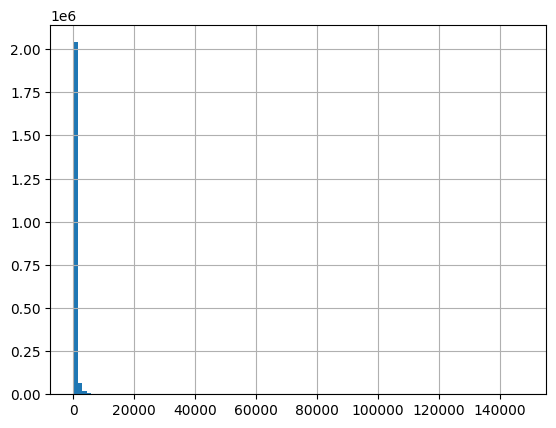

In [45]:
import matplotlib.pyplot as plt

df['Distance'].hist(bins=100)
plt.show()

In [48]:
hourly_distance = df.groupby(df['Timestamp'].dt.hour)['Distance'].sum()
print(hourly_distance)

Timestamp
0     1.280139e+08
1     2.829296e+07
2     2.064001e+07
3     1.640741e+07
4     1.686555e+07
5     2.349217e+07
6     4.682992e+07
7     7.077013e+07
8     6.704861e+07
9     5.468602e+07
10    5.113069e+07
11    5.106550e+07
12    4.635591e+07
13    4.844537e+07
14    4.329065e+07
15    4.492776e+07
16    5.059551e+07
17    5.661731e+07
18    6.060505e+07
19    5.147488e+07
20    4.337565e+07
21    4.001224e+07
22    3.433958e+07
23    1.625691e+08
Name: Distance, dtype: float64


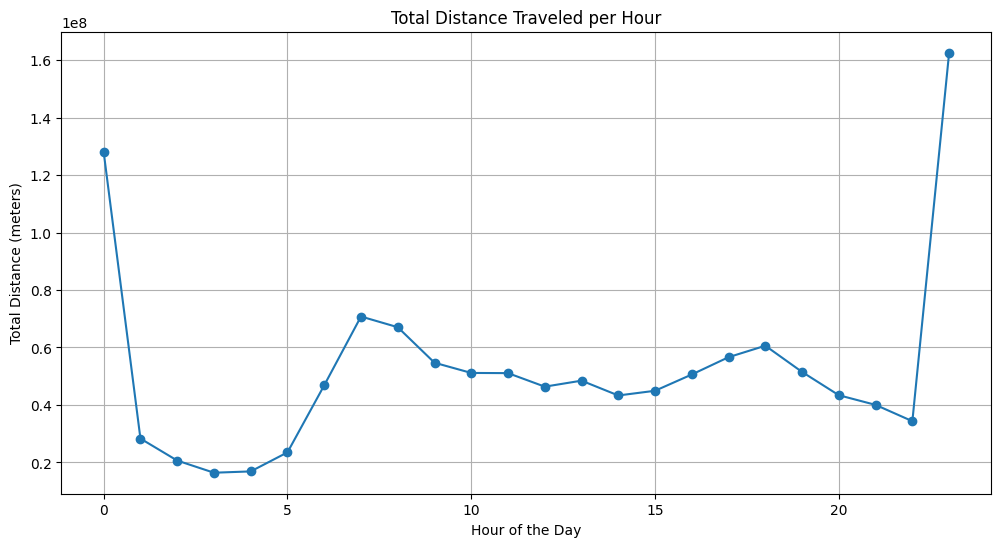

In [49]:
plt.figure(figsize=(12, 6))
plt.plot(hourly_distance.index, hourly_distance.values, marker='o')
plt.title('Total Distance Traveled per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Distance (meters)')
plt.grid(True)
plt.show()

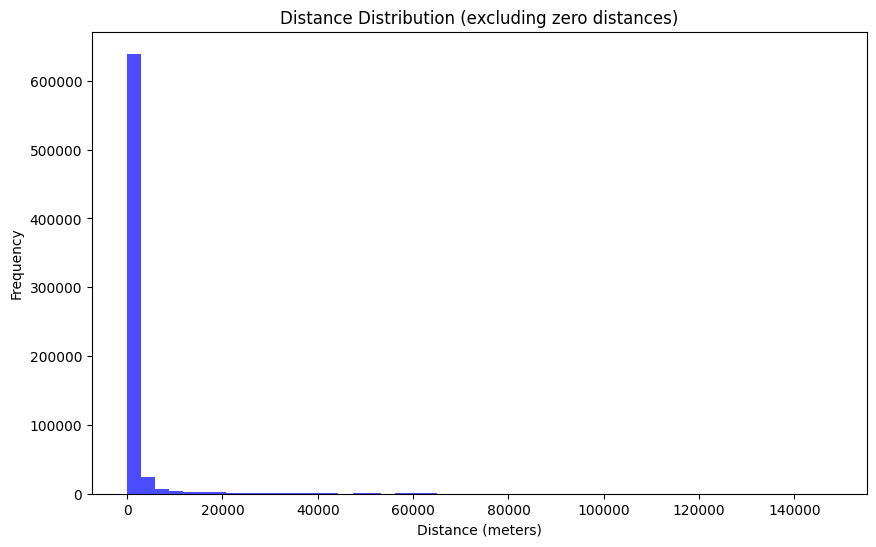

In [46]:
# 去除距离为零的值
df1 = df[df['Distance'] != 0]

# 绘制距离分布图
plt.figure(figsize=(10, 6))
plt.hist(df1['Distance'], bins=50, color='blue', alpha=0.7)
plt.title('Distance Distribution (excluding zero distances)')
plt.xlabel('Distance (meters)')
plt.ylabel('Frequency')
plt.show()

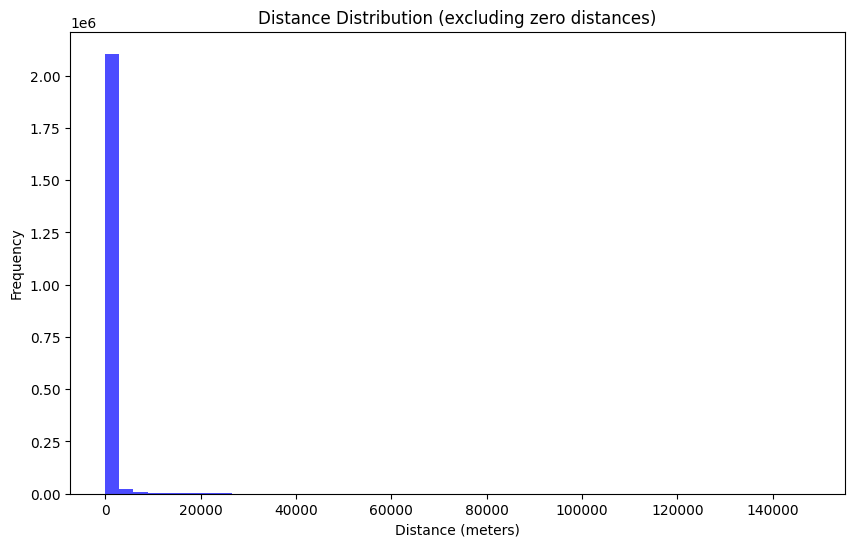

In [47]:
# 去除距离为一的值
df2 = df[df['Distance'] != 1]

# 绘制距离分布图
plt.figure(figsize=(10, 6))
plt.hist(df2['Distance'], bins=50, color='blue', alpha=0.7)
plt.title('Distance Distribution (excluding zero distances)')
plt.xlabel('Distance (meters)')
plt.ylabel('Frequency')
plt.show()

In [50]:
import pandas as pd
# 查看经纬度组合的不同值的个数
unique_locations = df.groupby(['Longitude', 'Latitude']).size().nunique()

print(f"不同的经纬度组合个数: {unique_locations}")

不同的经纬度组合个数: 837


In [55]:
df.to_csv('new_xinlin.csv', index=False)

In [62]:
import pandas as pd

# 假设 df 是你的 DataFrame，包含 'Longitude' 和 'Latitude' 列

# 首先，找出所有唯一的经纬度组合
unique_index = df.groupby(['Longitude', 'Latitude']).size().index.tolist()

# 然后，创建一个新的 DataFrame 来存储这些组合
unique_locations_df = pd.DataFrame(unique_index, columns=['Longitude', 'Latitude'])

# 现在 unique_locations_df 包含了所有唯一的经纬度组合
print(unique_locations_df)

        Longitude   Latitude
0         115.499    39.6572
1         115.512    39.6618
2      115.529001  39.732701
3      115.530092  39.733527
4      115.531942  39.727279
...           ...        ...
35148  117.419831  40.650861
35149  117.432047  40.644591
35150  117.435469  40.657803
35151  117.475277  40.646666
35152  117.489504  40.647807

[35153 rows x 2 columns]


In [63]:
unique_locations_df.to_csv('unique_locations_df.csv', index=False)

In [64]:
import pandas as pd

# 读取 unique_locations_df.csv 文件
df4 = pd.read_csv('unique_locations_df.csv')

# 获取前20条数据
top_20_data = df4.head(20)

# 将前20条数据保存到 test.csv 文件中
top_20_data.to_csv('test.csv', index=False)

# 打印完成信息
print("The first 20 rows have been saved to test.csv")

The first 20 rows have been saved to test.csv


In [65]:
df5 = pd.read_csv('test.csv')

In [66]:
import pandas as pd
import requests

# 假设 df 是你的 DataFrame，包含 'Longitude' 和 'Latitude' 列

# 将 'Longitude' 和 'Latitude' 列合并为API所需的格式
df5['Location'] = df5['Longitude'].astype(str) + ',' + df5['Latitude'].astype(str)

# 定义一个函数来调用地理编码API并获取地点类型
def get_location_types_from_api(location):
    api_url = "https://restapi.amap.com/v3/place/around?parameters"  # API URL
    parameters = {
        "location": location,
        "key": "9318d264911b49a667b58d40f67b7f29"  # API密钥
    }
    response = requests.get(api_url, params=parameters)
    if response.status_code == 200:
        data = response.json()
        # 假设地点类型以列表形式存储在JSON响应的 "types" 键中
        # 可以选择直接返回列表，或者将其转换为字符串
        return data.get("types", "unknown")  # 返回一个列表
        # 或者，如果你想要将类型列表转换为字符串形式：
        # return ', '.join(data.get("types", []))
    else:
        return "API request failed"

# 使用apply函数和定义的函数来获取地点类型
df5['Location_Types'] = df5['Location'].apply(get_location_types_from_api)

# 打印结果
print(df5[['Location', 'Location_Types']])

                Location Location_Types
0        115.499,39.6572        unknown
1        115.512,39.6618        unknown
2   115.529001,39.732701        unknown
3   115.530092,39.733527        unknown
4   115.531942,39.727279        unknown
5   115.534335,39.713479        unknown
6   115.544768,39.641763        unknown
7   115.568792,39.637548        unknown
8   115.584001,39.639701        unknown
9   115.586001,39.685601        unknown
10        115.59,39.6697        unknown
11  115.591016,39.632614        unknown
12  115.595448,39.629298        unknown
13  115.595546,39.629582        unknown
14  115.603473,39.643004        unknown
15  115.610352,39.856183        unknown
16  115.610857,39.646152        unknown
17  115.617063,39.724887        unknown
18  115.625668,39.639152        unknown
19  115.628949,39.827944        unknown


In [68]:
#用Geopy库试试吧
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

# 创建Nominatim地理编码器实例（用户代理是必需的）
geolocator = Nominatim(user_agent="Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.75 Safari/537.36")

# 地理坐标列表
coordinates = [
    (34.052235, -118.243683),
    (40.712776, -74.005974),
    # 添加更多坐标...
]

# 存储逆地理编码结果
addresses = []

for coord in coordinates:
    try:
        # 逆地理编码坐标
        address = geolocator.reverse(coord, exactly_one=True)
        addresses.append(address.address)
    except GeocoderTimedOut:
        print(f"Geocoder timed out for coordinates: {coord}")
    except Exception as e:
        print(f"Error encountered for coordinates {coord}: {e}")

# 打印地址
for addr in addresses:
    print(addr)

Error encountered for coordinates (40.712776, -74.005974): HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.712776&lon=-74.005974&format=json&addressdetails=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))
Los Angeles Police Department Headquarters, South Spring Street, Civic Center, Downtown, Los Angeles, Los Angeles County, California, 90012, United States


In [70]:
import geopy
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderServiceError
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry
import requests

# 设置读取超时时间
geopy.geocoders.options.default_timeout = 10

# 创建Nominatim地理编码器实例
geolocator = Nominatim(user_agent="Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.75 Safari/537.36")


# 设置重试策略
session = requests.Session()
retries = Retry(total=3, backoff_factor=1, status_forcelist=[502, 503, 504])
session.mount('http://', HTTPAdapter(max_retries=retries))

# 地理坐标
coordinates = [
    (34.052235, -118.243683),
    (40.712776, -74.005974),
    # 添加更多坐标...
]

# 逆地理编码并处理重试
for coord in coordinates:
    try:
        address = geolocator.reverse(coord, exactly_one=True, timeout=geopy.geocoders.options.default_timeout)
        print(address.address)
    except GeocoderTimedOut as e:
        print(f"Geocoder timed out for coordinates: {coord}. Error: {e}")
    except GeocoderServiceError as e:
        print(f"Geocoder service error for coordinates: {coord}. Error: {e}")
    except Exception as e:
        print(f"Error encountered for coordinates {coord}: {e}")

Los Angeles Police Department Headquarters, South Spring Street, Civic Center, Downtown, Los Angeles, Los Angeles County, California, 90012, United States
New York City Hall, 260, Broadway, Lower Manhattan, Manhattan Community Board 1, Manhattan, New York County, City of New York, New York, 10000, United States


In [72]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderServiceError

# 创建Nominatim地理编码器实例
geolocator = Nominatim(user_agent="Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.75 Safari/537.36")


# 读取CSV文件
df6 = pd.read_csv('test.csv')

# 逆地理编码函数
def reverse_geocode(coordinates):
    try:
        # 解包坐标元组
        lat, lon = coordinates
        # 逆地理编码
        location = geolocator.reverse((lat, lon), exactly_one=True)
        # 返回地址
        return location.address if location else 'Address not found'
    except (GeocoderTimedOut, GeocoderServiceError) as e:
        print(f"Geocoder error: {e}")
        return 'Geocoder error'

# 应用逆地理编码函数到每行数据
df6['Address'] = df6[['Latitude', 'Longitude']].apply(lambda coord: reverse_geocode(coord), axis=1)

# 保存结果到新的CSV文件
df6.to_csv('unique_locations_df_with_addresses.csv', index=False)

# 打印完成信息
print("Addresses have been added to the DataFrame and saved to a new CSV file.")

Addresses have been added to the DataFrame and saved to a new CSV file.


In [75]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderServiceError

# 创建Nominatim地理编码器实例
geolocator = Nominatim(user_agent="Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.75 Safari/537.36")

# 读取CSV文件
df6 = pd.read_csv('test.csv')

# 逆地理编码函数，包含地点类型
def reverse_geocode(coordinates):
    try:
        lat, lon = coordinates
        # 使用addressdetails参数请求详细地址信息
        location = geolocator.reverse((lat, lon), exactly_one=True, addressdetails=True)
        if location:
            # 安全地访问'addressdetails'，如果不存在则使用默认值
            address_details = location.raw.get('addressdetails', {})
            # 提取地点类型，如果不存在则使用'Unknown'
            location_type = address_details.get('type', 'Unknown')
            return location.address, location_type
        else:
            return 'Address not found', 'Unknown'
    except (GeocoderTimedOut, GeocoderServiceError) as e:
        print(f"Geocoder error: {e}")
        return None, 'Error'

# 应用逆地理编码函数到每行数据
df6[['Address', 'Location_Type']] = df6[['Latitude', 'Longitude']].apply(lambda coord: reverse_geocode(coord), axis=1, result_type="expand")

# 保存结果到新的CSV文件
df6.to_csv('unique_locations_df_with_addresses_and_types.csv', index=False)

print("Addresses and location types have been added to the DataFrame and saved to a new CSV file.")

Addresses and location types have been added to the DataFrame and saved to a new CSV file.


In [76]:
!pip install tqdm  -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 8.2 MB/s eta 0:00:00


In [82]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderServiceError
from tqdm import tqdm
import time

# 创建Nominatim地理编码器实例
geolocator = Nominatim(user_agent="Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.75 Safari/537.36")

# 读取CSV文件
df = pd.read_csv('unique_locations_df.csv')

# 逆地理编码函数
def reverse_geocode(coordinates):
    try:
        lat, lon = coordinates
        location = geolocator.reverse((lat, lon), exactly_one=True)
        return location.address if location else 'Address not found'
    except (GeocoderTimedOut, GeopyServiceError) as e:
        print(f"Geocoder error: {e}")
        return None

# 批处理参数
batch_size = 20  # 每批处理100条记录
sleep_time = 1  # 每批处理后等待1秒

# 初始化进度条
pbar = tqdm(total=len(df))

# 分批次处理数据
for start in range(0, len(df), batch_size):
    batch_df = df.iloc[start:start+batch_size].copy()
    batch_df['Address'] = batch_df.apply(lambda row: reverse_geocode((row['Latitude'], row['Longitude'])), axis=1)
    
    # 将当前批次的结果追加到新的CSV文件中
    batch_df.to_csv('unique_locations_df_with_addresses.csv', mode='a', index=False, header=start==0)
    
    pbar.update(batch_df.shape[0])  # 更新进度条
    time.sleep(sleep_time)  # 等待一段时间后再处理下一批

# 清空 tqdm 的屏幕缓存
pbar.close()

print("Addresses have been added to the DataFrame and saved incrementally to a new CSV file.")


  0%|                                                 | 0/35153 [01:03<?, ?it/s]

  1%|▍                                   | 420/35153 [42:07<58:09:05,  6.03s/it]

NameError: name 'GeopyServiceError' is not defined

In [85]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderServiceError
from tqdm import tqdm

# 创建Nominatim地理编码器实例
geolocator = Nominatim(user_agent="Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.75 Safari/537.36")

# 读取原始数据集
df = pd.read_csv('unique_locations_df.csv')

# 检查之前已处理的记录数量，确定从哪里开始继续处理
# 如果是第一次运行，可以注释掉以下两行
df_partial = pd.read_csv('unique_locations_df_with_addresses.csv')
start_index = len(df_partial)

# 如果原始数据集的行数大于已处理的数量，继续处理剩余的数据
if len(df) > start_index:
    # 逆地理编码函数
    def reverse_geocode(coordinates):
        try:
            lat, lon = coordinates
            location = geolocator.reverse((lat, lon), exactly_one=True)
            return location.address if location else 'Address not found'
        except (GeocoderTimedOut, GeocoderServiceError) as e:
            print(f"Geocoder error: {e}")
            return None

    # 批处理参数
    batch_size = 20  # 每批处理20条记录
    sleep_time = 1  # 每批处理后等待1秒

    # 进度条初始化
    pbar = tqdm(total=len(df) - start_index)

    # 继续处理剩余的数据
    for start in range(start_index, len(df), batch_size):
        # 获取当前批次的数据
        batch_df = df.iloc[start:start+batch_size].copy()

        # 逆地理编码并添加地址列
        batch_df['Address'] = batch_df.apply(
            lambda row: reverse_geocode((row['Latitude'], row['Longitude'])),
            axis=1
        )

        # 将当前批次的结果追加到CSV文件中
        batch_df.to_csv('unique_locations_df_with_addresses.csv', mode='a', index=False, header=False)

        pbar.update(batch_df.shape[0])  # 更新进度条
        time.sleep(sleep_time)  # 等待一段时间后再处理下一批

    # 清空 tqdm 的屏幕缓存
    pbar.close()

    print("The remaining addresses have been processed and saved incrementally.")
else:
    print("All data has been processed.")

  3%|▉                                 | 680/24053 [1:08:10<39:00:27,  6.01s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.900721&lon=116.314387&format=json&addressdetails=1 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x36f837b20>, 'Connection to nominatim.openstreetmap.org timed out. (connect timeout=10)'))


  8%|██▌                              | 1900/24053 [3:20:05<58:17:59,  9.47s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.027999&lon=116.326913&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36f837670>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))


  8%|██▋                              | 1920/24053 [3:20:06<40:52:35,  6.65s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.040031&lon=116.326914&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36f807d60>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.950654&lon=116.326922&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36f807580>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.141458&lon=116.326925&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

  8%|██▋                              | 1940/24053 [3:20:07<28:41:13,  4.67s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.924583&lon=116.327046&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b057e20>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.92635&lon=116.32705&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35fba3d30>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.926354&lon=116.327053&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSCo

  8%|██▋                              | 1960/24053 [3:20:08<20:09:39,  3.29s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.047046&lon=116.327321&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b5d8c10>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.894531&lon=116.327331&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b0571f0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.723047&lon=116.327333&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

  8%|██▋                              | 1980/24053 [3:20:09<14:11:53,  2.32s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.107352&lon=116.327464&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36f837b80>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.948739&lon=116.327469&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b0572b0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.03424&lon=116.32747&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSCo

  8%|██▋                              | 2000/24053 [3:20:10<10:01:43,  1.64s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.991101&lon=116.327681&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36f807310>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.818791&lon=116.327687&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b046610>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.056227&lon=116.327687&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

  8%|██▊                               | 2020/24053 [3:20:11<7:06:48,  1.16s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.95589&lon=116.32781&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36f8076a0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.086073&lon=116.327811&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b046370>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.955861&lon=116.327821&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSCo

  8%|██▉                               | 2040/24053 [3:20:12<5:04:16,  1.21it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.9024&lon=116.32795&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b065a30>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.98321&lon=116.32795&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b046bb0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.902407&lon=116.327952&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConne

  9%|██▊                              | 2060/24053 [3:36:31<93:15:11, 15.26s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.060846&lon=116.328104&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36f837490>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.73196&lon=116.32814&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b0392b0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.731961&lon=116.328141&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSCo

  9%|██▊                              | 2080/24053 [3:36:32<65:19:08, 10.70s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.814231&lon=116.328306&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36ffe9970>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.889371&lon=116.328311&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b039d00>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.985551&lon=116.328321&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

  9%|██▉                              | 2100/24053 [3:36:33<45:46:50,  7.51s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.73652&lon=116.32846&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b039670>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.848261&lon=116.328481&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b0394f0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.996911&lon=116.328481&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSCo

  9%|██▉                              | 2120/24053 [3:36:35<32:06:57,  5.27s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.470151&lon=116.328631&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b0390d0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.718926&lon=116.328637&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b046850>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.927111&lon=116.328641&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

  9%|██▉                              | 2140/24053 [3:36:36<22:33:29,  3.71s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.751111&lon=116.328888&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b057280>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.934316&lon=116.328912&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b0651f0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.968081&lon=116.328931&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

  9%|██▉                              | 2160/24053 [3:43:40<54:26:59,  8.95s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.945282&lon=116.329099&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b5d8040>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.872047&lon=116.329111&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b0653d0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.890821&lon=116.329121&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

  9%|██▉                              | 2180/24053 [3:43:41<38:10:48,  6.28s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.898121&lon=116.329382&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b065cd0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.726101&lon=116.329401&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b0394c0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.009668&lon=116.329401&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

  9%|███                              | 2200/24053 [3:43:42<26:48:24,  4.42s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.979071&lon=116.329651&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b057c10>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.879629&lon=116.329661&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36f807880>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.900946&lon=116.329661&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

  9%|███                              | 2220/24053 [3:43:43<18:50:45,  3.11s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.508481&lon=116.329835&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a6a8490>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.954701&lon=116.329851&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b039940>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.843869&lon=116.329857&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

  9%|███                              | 2240/24053 [3:43:44<13:16:56,  2.19s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.035767&lon=116.330108&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b046bb0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.742155&lon=116.330126&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b046100>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.953502&lon=116.330127&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 14%|████▊                            | 3480/24053 [5:48:17<34:14:04,  5.99s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.039818&lon=116.343238&format=json&addressdetails=1 (Caused by ProtocolError('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer')))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.166291&lon=116.343241&format=json&addressdetails=1 (Caused by ProtocolError('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer')))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.913831&lon=116.343281&format=json&addressdetails=1 (Caused by ProtocolError('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer')))


 15%|████▉                            | 3580/24053 [5:59:04<35:09:45,  6.18s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.949502&lon=116.344191&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36f807c10>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))


 20%|██████▍                          | 4700/24053 [7:53:52<32:34:12,  6.06s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.996991&lon=116.355589&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36f8077c0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))


 20%|██████▋                          | 4900/24053 [8:14:57<32:15:52,  6.06s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.919292&lon=116.357941&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b039850>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))


 21%|██████▋                         | 4980/24053 [8:39:06<105:36:06, 19.93s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.6969&lon=116.3586&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36f807280>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.934202&lon=116.358604&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b039910>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.833859&lon=116.358607&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConn

 21%|██████▊                          | 5000/24053 [8:39:07<73:55:45, 13.97s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.96575&lon=116.35866&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b046a30>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.870229&lon=116.358662&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b046760>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.99974&lon=116.35867&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConn

 21%|██████▉                          | 5020/24053 [8:39:08<51:46:48,  9.79s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.796131&lon=116.358817&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b065490>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.792523&lon=116.358822&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b0654f0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.865618&lon=116.358834&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 21%|██████▉                          | 5040/24053 [8:39:09<36:17:52,  6.87s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.016369&lon=116.358986&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b039820>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.97281&lon=116.35899&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b0396d0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.54288&lon=116.35899&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConn

 21%|██████▉                          | 5060/24053 [8:39:10<25:28:00,  4.83s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.053589&lon=116.359201&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f929970>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.960525&lon=116.359204&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b03eb80>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.842593&lon=116.359231&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 21%|██████▉                          | 5080/24053 [8:56:12<98:35:05, 18.71s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.751944&lon=116.359444&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b065880>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.006944&lon=116.359444&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b0406d0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.888236&lon=116.359469&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 21%|██████▉                          | 5100/24053 [8:56:13<69:01:17, 13.11s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.808296&lon=116.359741&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b03a5e0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.910562&lon=116.359743&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b0659a0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.95276&lon=116.35975&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSCo

 21%|███████                          | 5120/24053 [8:56:14<48:20:55,  9.19s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.987419&lon=116.359963&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b0658e0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.923132&lon=116.359964&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b0653a0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.9783&lon=116.35998&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSCon

 21%|███████                          | 5140/24053 [8:56:15<33:53:42,  6.45s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.940866&lon=116.360179&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b040040>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.857061&lon=116.360181&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b057490>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.004753&lon=116.360192&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 21%|███████                          | 5160/24053 [8:56:16<23:47:11,  4.53s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.831961&lon=116.360395&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b057370>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.910241&lon=116.360401&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b065b80>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.907331&lon=116.360403&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 22%|███████                          | 5180/24053 [9:01:44<42:22:32,  8.08s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.05852&lon=116.360597&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b065cd0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.789216&lon=116.360604&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36f807280>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.85455&lon=116.36061&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSCon

 22%|███████▏                         | 5200/24053 [9:01:45<29:42:58,  5.67s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.92738&lon=116.36081&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36f807520>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.927381&lon=116.360812&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36f807160>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.927401&lon=116.360821&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSCo

 22%|███████▏                         | 5220/24053 [9:01:46<20:51:45,  3.99s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.097441&lon=116.360972&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b03ad90>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.098217&lon=116.360973&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a691be0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.883201&lon=116.361001&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 22%|███████▏                         | 5240/24053 [9:01:47<14:40:41,  2.81s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.901891&lon=116.361291&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b03a9d0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.968338&lon=116.361291&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a6918e0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.701191&lon=116.361311&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 22%|███████▏                         | 5260/24053 [9:01:48<10:20:54,  1.98s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.24516&lon=116.3616&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a67c670>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.741215&lon=116.361602&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a691460>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.055236&lon=116.361608&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSCon

 22%|███████▍                          | 5280/24053 [9:01:49<7:19:16,  1.40s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.912381&lon=116.361851&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a67c670>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.933488&lon=116.361855&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b040e80>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.0448&lon=116.36188&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSCon

 24%|███████▌                       | 5820/24053 [10:13:13<108:13:14, 21.37s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.06574&lon=116.36858&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b040e20>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.876641&lon=116.368581&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b0409d0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.012481&lon=116.368581&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSCo

 24%|███████▊                        | 5840/24053 [10:13:14<75:45:07, 14.97s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.912566&lon=116.368608&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b040b80>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.022222&lon=116.368611&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b040ee0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.877345&lon=116.368618&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 24%|███████▊                        | 5860/24053 [10:13:15<53:03:09, 10.50s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.87991&lon=116.36882&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b065d00>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.877471&lon=116.368821&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a67c6a0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.998271&lon=116.368821&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSCo

 24%|███████▊                        | 5880/24053 [10:13:16<37:10:39,  7.36s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.883301&lon=116.369001&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a691160>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.893701&lon=116.369001&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b040a00>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.895301&lon=116.369001&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 25%|███████▌                       | 5900/24053 [10:30:59<106:22:45, 21.10s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.87014&lon=116.36921&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b0401f0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.972351&lon=116.369241&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b040250>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.972361&lon=116.369241&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSCo

 25%|███████▉                        | 5920/24053 [10:31:00<74:27:56, 14.78s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.901488&lon=116.369436&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a67c490>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.942035&lon=116.369436&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36f8076a0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.836151&lon=116.36944&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSC

 25%|███████▉                        | 5940/24053 [10:31:01<52:09:06, 10.37s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.784164&lon=116.369705&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b0404f0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.697372&lon=116.369732&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36f8076a0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.947668&lon=116.369741&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 25%|███████▉                        | 5960/24053 [10:31:03<36:32:48,  7.27s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.969401&lon=116.370021&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b03a730>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.950291&lon=116.370026&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b039af0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.814591&lon=116.370029&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 25%|███████▉                        | 5980/24053 [10:31:04<25:38:09,  5.11s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.906531&lon=116.370221&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b040970>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.103028&lon=116.370222&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b040f10>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.954753&lon=116.370239&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 25%|███████▉                        | 6000/24053 [10:47:28<91:59:44, 18.35s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.92504&lon=116.37053&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b0391f0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.964859&lon=116.370556&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b0391f0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.920506&lon=116.370571&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSCo

 25%|████████                        | 6020/24053 [10:47:29<64:24:18, 12.86s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.736011&lon=116.370771&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b040bb0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.906459&lon=116.370771&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a691ee0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.957883&lon=116.370771&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 25%|████████                        | 6040/24053 [10:47:30<45:06:49,  9.02s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.5675&lon=116.371&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a691490>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.893401&lon=116.371001&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b040250>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.904801&lon=116.371001&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConne

 25%|████████                        | 6060/24053 [10:47:32<31:37:32,  6.33s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.91252&lon=116.37122&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b039550>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.912553&lon=116.371231&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b039580>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.928671&lon=116.371231&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSCo

 25%|████████                        | 6080/24053 [10:47:33<22:11:40,  4.45s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.093906&lon=116.371424&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36f8073a0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.102444&lon=116.371445&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36f8379a0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.914371&lon=116.371454&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 25%|████████                        | 6100/24053 [11:03:05<85:17:34, 17.10s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.938326&lon=116.371711&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36f807940>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.803853&lon=116.371722&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a21d3a0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.900291&lon=116.371731&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 25%|████████▏                       | 6120/24053 [11:03:06<59:43:05, 11.99s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.989011&lon=116.371986&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a20fe50>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.786899&lon=116.371993&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a20f400>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.950269&lon=116.371996&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 26%|████████▏                       | 6140/24053 [11:03:07<41:50:10,  8.41s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.856048&lon=116.372325&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b065820>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.884743&lon=116.372331&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a20fc10>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.902561&lon=116.372351&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 26%|████████▏                       | 6160/24053 [11:03:09<29:19:57,  5.90s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.897486&lon=116.372769&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a20f1f0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.781738&lon=116.372772&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a20f580>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.891541&lon=116.372781&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 26%|████████▏                       | 6180/24053 [11:03:10<20:35:18,  4.15s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.15795&lon=116.37296&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36f807a90>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.99866&lon=116.372982&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36f807d60>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.932827&lon=116.372989&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSCon

 26%|████████▏                       | 6200/24053 [11:16:47<75:13:08, 15.17s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.893567&lon=116.373266&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36f8376d0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.019111&lon=116.373278&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a21d5b0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.863563&lon=116.373294&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 26%|████████▎                       | 6220/24053 [11:16:48<52:40:25, 10.63s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.904305&lon=116.373567&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a21df40>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.956327&lon=116.373575&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b065f40>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.240411&lon=116.373591&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 26%|████████▎                       | 6240/24053 [11:16:49<36:54:41,  7.46s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.988811&lon=116.373816&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a20fc10>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.88832&lon=116.37385&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a6915b0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.834722&lon=116.373851&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSCo

 26%|████████▎                       | 6260/24053 [11:16:51<25:53:22,  5.24s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.975529&lon=116.373957&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b0407f0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.834671&lon=116.373971&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b065760>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.984463&lon=116.374001&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 28%|█████████                       | 6820/24053 [12:14:21<29:54:17,  6.25s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.124203&lon=116.383738&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36f837b20>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))


 31%|█████████▉                      | 7440/24053 [13:17:32<27:29:24,  5.96s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.970277&lon=116.395&format=json&addressdetails=1 (Caused by ProtocolError('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer')))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.863333&lon=116.395001&format=json&addressdetails=1 (Caused by ProtocolError('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer')))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.924166&lon=116.395001&format=json&addressdetails=1 (Caused by ProtocolError('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer')))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.969167&lon=116.395001

 33%|██████████▍                     | 7840/24053 [13:58:23<27:08:53,  6.03s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.964105&lon=116.400946&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a68cdf0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))


 33%|██████████▌                     | 7940/24053 [14:09:27<27:57:02,  6.24s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.057311&lon=116.401996&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a691340>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))


 57%|█████████████████▊             | 13800/24053 [24:10:30<41:14:11, 14.48s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.966539&lon=116.481453&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a691250>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.910278&lon=116.481475&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b040a90>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.895441&lon=116.481498&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 57%|█████████████████▊             | 13820/24053 [24:17:47<47:26:36, 16.69s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.804676&lon=116.481542&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a691700>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.243813&lon=116.481561&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b040fa0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.243849&lon=116.481568&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 58%|█████████████████▊             | 13840/24053 [24:17:48<33:11:25, 11.70s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.922087&lon=116.481929&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b057430>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.988241&lon=116.481931&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b03af10>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.757728&lon=116.481944&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 58%|█████████████████▊             | 13860/24053 [24:17:49<23:13:56,  8.21s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.915472&lon=116.482251&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b046610>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.779741&lon=116.482261&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a691b80>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.018317&lon=116.4823&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSCo

 58%|█████████████████▉             | 13880/24053 [24:17:50<16:16:30,  5.76s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.967931&lon=116.482891&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b039f40>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.838448&lon=116.482895&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a21deb0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.959942&lon=116.482901&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 58%|█████████████████▉             | 13900/24053 [24:17:51<11:24:52,  4.05s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.88185&lon=116.48313&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b03a9a0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.881756&lon=116.483156&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b039970>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.877327&lon=116.483177&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSCo

 58%|██████████████████▌             | 13920/24053 [24:17:52<8:01:07,  2.85s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.891699&lon=116.483842&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a67ccd0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.865715&lon=116.483861&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b03ab20>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.740391&lon=116.483871&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 58%|██████████████████▌             | 13940/24053 [24:17:53<5:38:46,  2.01s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.812001&lon=116.484101&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b065970>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.962222&lon=116.484107&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a691250>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.812111&lon=116.484111&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 58%|██████████████████▌             | 13960/24053 [24:17:54<3:59:18,  1.42s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.946419&lon=116.484397&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a21d640>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.097831&lon=116.484411&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36f807ac0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.890832&lon=116.484414&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 58%|██████████████████▌             | 13980/24053 [24:17:56<2:49:49,  1.01s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.973157&lon=116.484672&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b040e50>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.047496&lon=116.484682&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b0400a0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.845551&lon=116.484695&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 58%|██████████████████▋             | 14000/24053 [24:17:57<2:01:16,  1.38it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.8691&lon=116.4849&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a691610>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.952192&lon=116.484922&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b065250>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.903513&lon=116.484932&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConn

 58%|██████████████████▋             | 14020/24053 [24:17:58<1:27:21,  1.91it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.973333&lon=116.485277&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b039eb0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.931667&lon=116.485278&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a67cc10>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.874668&lon=116.485306&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 58%|██████████████████▋             | 14040/24053 [24:17:59<1:03:38,  2.62it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.991941&lon=116.485552&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b040ac0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.613055&lon=116.485555&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a67cf70>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.834278&lon=116.485556&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 58%|███████████████████▊              | 14060/24053 [24:18:00<47:04,  3.54it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.991901&lon=116.486001&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x30250d0d0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.595809&lon=116.486013&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b065940>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.880193&lon=116.486016&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 59%|███████████████████▉              | 14080/24053 [24:18:01<35:30,  4.68it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.761752&lon=116.486341&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a21d1c0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.910595&lon=116.486354&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a67c6d0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.898222&lon=116.486359&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 59%|███████████████████▉              | 14100/24053 [24:18:02<27:24,  6.05it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.968241&lon=116.486921&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b039dc0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.893629&lon=116.486932&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a67cdf0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.898333&lon=116.486944&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 59%|███████████████████▉              | 14120/24053 [24:18:03<21:45,  7.61it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.814051&lon=116.487301&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a691490>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.724668&lon=116.487324&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b057280>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.893481&lon=116.487341&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 59%|███████████████████▉              | 14140/24053 [24:18:04<17:47,  9.28it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.981701&lon=116.487785&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b040d30>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.906671&lon=116.487787&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3024ecdf0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.838083&lon=116.48779&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSC

 59%|████████████████████              | 14160/24053 [24:18:05<15:01, 10.98it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.973071&lon=116.488161&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a6915b0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.890302&lon=116.488185&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b03a550>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.854641&lon=116.488285&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 59%|████████████████████              | 14180/24053 [24:18:06<13:04, 12.58it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.913694&lon=116.488545&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a691a60>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.56998&lon=116.48855&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b039f10>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.788182&lon=116.488561&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSCo

 59%|████████████████████              | 14200/24053 [24:18:07<11:42, 14.02it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.919959&lon=116.488876&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x30250d670>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.003888&lon=116.488888&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x30250dee0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.974809&lon=116.488909&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 59%|████████████████████              | 14220/24053 [24:18:08<10:45, 15.23it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.9075&lon=116.489166&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b0395b0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.280434&lon=116.489183&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b0399d0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.761853&lon=116.489228&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSCo

 59%|████████████████████▏             | 14240/24053 [24:18:09<10:05, 16.21it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.022724&lon=116.489553&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b039280>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.690462&lon=116.489577&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b065fa0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.040541&lon=116.489582&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 59%|████████████████████▏             | 14260/24053 [24:18:10<09:37, 16.96it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.859464&lon=116.489903&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x302497f70>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.798751&lon=116.489944&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b039fa0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.911696&lon=116.489991&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 59%|████████████████████▏             | 14280/24053 [24:18:11<09:17, 17.55it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.001944&lon=116.490555&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a20f280>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.964085&lon=116.490593&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36f807bb0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.000831&lon=116.490601&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 59%|████████████████████▏             | 14300/24053 [24:18:12<09:02, 17.98it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.766594&lon=116.490911&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a21d040>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.919015&lon=116.490926&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3024ec4f0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.910456&lon=116.490969&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 60%|████████████████████▏             | 14320/24053 [24:18:13<08:51, 18.30it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.967731&lon=116.491196&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a67cd60>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.027331&lon=116.491249&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b040490>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.771041&lon=116.491251&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 60%|████████████████████▎             | 14340/24053 [24:18:14<08:43, 18.54it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.877529&lon=116.491557&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b040d90>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.785169&lon=116.491593&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36f8377f0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.098464&lon=116.491622&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 60%|████████████████████▎             | 14360/24053 [24:18:15<08:38, 18.70it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.8453&lon=116.492&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36f837af0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.167581&lon=116.492016&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b040970>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.881462&lon=116.492096&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConne

 60%|████████████████████▎             | 14380/24053 [24:18:17<08:34, 18.80it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.914533&lon=116.492615&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x30248bb50>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.789221&lon=116.492651&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b0391f0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.855283&lon=116.492652&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 60%|████████████████████▎             | 14400/24053 [24:18:18<08:31, 18.86it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.896819&lon=116.492989&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b065c40>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.021527&lon=116.493005&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a20f460>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.853249&lon=116.493027&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 60%|████████████████████▍             | 14420/24053 [24:18:19<08:29, 18.92it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.972983&lon=116.493505&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a21d8b0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.978714&lon=116.493531&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3024ec5e0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.782847&lon=116.493578&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 60%|████████████████████▍             | 14440/24053 [24:18:20<08:26, 18.98it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.765911&lon=116.493982&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b065d90>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.893114&lon=116.493985&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x30248b8e0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.928503&lon=116.493993&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 60%|████████████████████▍             | 14460/24053 [24:18:21<08:24, 19.03it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.892266&lon=116.494174&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x30248b8e0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.896709&lon=116.494176&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b0391f0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.168349&lon=116.494184&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 60%|████████████████████▍             | 14480/24053 [24:18:22<08:22, 19.06it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.859848&lon=116.494507&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x302496520>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.929046&lon=116.494527&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3024965b0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.009577&lon=116.494539&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 60%|████████████████████▍             | 14500/24053 [24:18:23<08:21, 19.05it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.861743&lon=116.494941&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x30248ba60>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.881242&lon=116.494979&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x30250d2e0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.938055&lon=116.495001&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 60%|████████████████████▌             | 14520/24053 [24:18:24<08:19, 19.08it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.788565&lon=116.495374&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b065910>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.922228&lon=116.49538&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36f807b50>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.93642&lon=116.49538&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSCon

 60%|████████████████████▌             | 14540/24053 [24:18:25<08:18, 19.08it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.922331&lon=116.495683&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x30248bd30>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.015298&lon=116.495687&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x302496a30>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.907444&lon=116.495694&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 61%|████████████████████▌             | 14560/24053 [24:18:26<08:17, 19.08it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.809994&lon=116.495987&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x302475160>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.9709&lon=116.496&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3024ec340>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.9981&lon=116.496&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection

 61%|████████████████████▌             | 14580/24053 [24:18:27<08:15, 19.11it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.174481&lon=116.496291&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36f807a00>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.842517&lon=116.496302&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b057430>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.848633&lon=116.496327&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 61%|████████████████████▋             | 14600/24053 [24:18:28<08:15, 19.09it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.090691&lon=116.49669&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b040610>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.767706&lon=116.496695&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a67c910>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.759185&lon=116.496696&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSC

 61%|████████████████████▋             | 14620/24053 [24:18:29<08:14, 19.08it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.979352&lon=116.497176&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x302475460>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.684422&lon=116.497201&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3023cf280>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.915&lon=116.497222&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSCon

 61%|████████████████████▋             | 14640/24053 [24:18:30<08:13, 19.09it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.880219&lon=116.497596&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36f8071c0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.922542&lon=116.49762&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a67c610>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.888639&lon=116.497623&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSC

 61%|████████████████████▋             | 14660/24053 [24:18:31<08:12, 19.09it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.943601&lon=116.497986&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36f807bb0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.208051&lon=116.498012&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x30250d280>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.864334&lon=116.498014&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 61%|████████████████████▊             | 14680/24053 [24:18:32<08:10, 19.11it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.923333&lon=116.498333&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a6915e0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.998888&lon=116.498333&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3024ecd90>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.919661&lon=116.498351&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 61%|████████████████████▊             | 14700/24053 [24:18:33<08:09, 19.10it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.939737&lon=116.498631&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b0395b0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.728611&lon=116.498642&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b040eb0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.008711&lon=116.498653&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 61%|████████████████████▊             | 14720/24053 [24:18:34<08:08, 19.09it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.917094&lon=116.498913&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a21d5e0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.808987&lon=116.498915&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b065d60>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.984541&lon=116.498922&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 61%|████████████████████▊             | 14740/24053 [24:18:35<08:08, 19.07it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.871292&lon=116.499106&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b065250>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.913888&lon=116.499166&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b03a610>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.946944&lon=116.499166&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 61%|████████████████████▊             | 14760/24053 [24:18:36<08:08, 19.04it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.905593&lon=116.499598&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a691610>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.895431&lon=116.499601&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36f807940>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.089083&lon=116.499602&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 61%|████████████████████▉             | 14780/24053 [24:18:37<08:07, 19.04it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.905917&lon=116.500028&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b065f40>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.979874&lon=116.500075&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x30248b8b0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.927131&lon=116.500111&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 62%|████████████████████▉             | 14800/24053 [24:18:39<08:05, 19.04it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.893776&lon=116.500496&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x30248bd00>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.864301&lon=116.500501&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b065280>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.016835&lon=116.50051&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSC

 62%|████████████████████▉             | 14820/24053 [24:18:40<08:04, 19.05it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.793658&lon=116.500662&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x302475490>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.799456&lon=116.500705&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b039d90>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.758221&lon=116.500752&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 62%|████████████████████▉             | 14840/24053 [24:18:41<08:03, 19.07it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.035783&lon=116.501102&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x30250d2b0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.859444&lon=116.501111&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x302475f40>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.934444&lon=116.501111&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 62%|█████████████████████             | 14860/24053 [24:18:42<08:02, 19.07it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.998954&lon=116.501493&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3024752e0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.697171&lon=116.501495&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3024755e0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.60515&lon=116.50153&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSCo

 62%|█████████████████████             | 14880/24053 [24:18:43<08:00, 19.08it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.885296&lon=116.501764&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36f807040>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.840333&lon=116.501778&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36f807040>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.660721&lon=116.501781&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 62%|█████████████████████             | 14900/24053 [24:18:44<07:59, 19.07it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.986051&lon=116.501998&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x302475610>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.9227&lon=116.502&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a20f640>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.820415&lon=116.502026&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConne

 62%|█████████████████████             | 14920/24053 [24:18:45<07:59, 19.06it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.716231&lon=116.502302&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3023c13d0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.995983&lon=116.502304&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a20f3a0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.8029167&lon=116.502306&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTP

 62%|█████████████████████             | 14940/24053 [24:18:46<07:58, 19.04it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.924471&lon=116.502667&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a21d5e0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.824278&lon=116.502683&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a21d7f0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.802166&lon=116.502716&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 62%|█████████████████████▏            | 14960/24053 [24:18:47<07:58, 18.99it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.729385&lon=116.502983&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a68ceb0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.9372&lon=116.503&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3024968e0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.977801&lon=116.503001&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConne

 62%|█████████████████████▏            | 14980/24053 [24:18:48<07:57, 19.01it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.912031&lon=116.503481&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3023e7070>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.911876&lon=116.503509&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3023c1430>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.793844&lon=116.503516&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 62%|█████████████████████▏            | 15000/24053 [24:18:49<07:57, 18.98it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.90917&lon=116.50392&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x302516190>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.909171&lon=116.503921&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a21d1f0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.007811&lon=116.503955&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSCo

 62%|█████████████████████▏            | 15020/24053 [24:18:50<07:54, 19.02it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.018437&lon=116.504219&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3023ae0d0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.971383&lon=116.504241&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3023aed00>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.842471&lon=116.504261&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 63%|█████████████████████▎            | 15040/24053 [24:18:51<07:53, 19.04it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.262424&lon=116.504567&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3023ae490>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.824313&lon=116.504581&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3023ae070>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.713853&lon=116.504583&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 63%|█████████████████████▎            | 15060/24053 [24:18:52<07:52, 19.05it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.022971&lon=116.504831&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3024ecee0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.910607&lon=116.504845&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3024ec5b0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.032768&lon=116.504883&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 63%|█████████████████████▎            | 15080/24053 [24:18:53<07:51, 19.04it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.776114&lon=116.505314&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36f8376d0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.909712&lon=116.505331&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x302496f40>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.950005&lon=116.505333&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 63%|█████████████████████▎            | 15100/24053 [24:18:54<07:52, 18.97it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.863186&lon=116.505657&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3023e7370>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.938195&lon=116.505676&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3024965b0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.901958&lon=116.505691&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 63%|█████████████████████▎            | 15120/24053 [24:18:55<07:49, 19.01it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.905833&lon=116.506111&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b039700>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.915278&lon=116.506111&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3023c1730>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.787861&lon=116.506121&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 63%|█████████████████████▍            | 15140/24053 [24:18:56<07:48, 19.03it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.921694&lon=116.506613&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x302496910>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.023813&lon=116.506623&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3023c1e50>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.926151&lon=116.506631&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 63%|█████████████████████▍            | 15160/24053 [24:18:57<07:48, 18.97it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.812771&lon=116.507221&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x302516790>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.770931&lon=116.507233&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3023c1220>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.924653&lon=116.507271&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 63%|█████████████████████▍            | 15180/24053 [24:18:59<07:48, 18.93it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.928727&lon=116.507605&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3023e7190>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.621301&lon=116.507631&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3023aba00>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.762734&lon=116.507633&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 63%|█████████████████████▍            | 15200/24053 [24:19:00<07:47, 18.92it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.9461001&lon=116.508001&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x302516490>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.948401&lon=116.508001&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3023abd30>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.951101&lon=116.508001&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTP

 63%|█████████████████████▌            | 15220/24053 [24:19:01<07:49, 18.83it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.777031&lon=116.508431&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f8c99a0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.934921&lon=116.508484&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f8c9d00>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.71349&lon=116.50851&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSCo

 63%|█████████████████████▌            | 15240/24053 [24:19:02<07:47, 18.84it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.222845&lon=116.508943&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f8c94c0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.013685&lon=116.508949&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3023ae0d0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.916417&lon=116.508961&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 63%|█████████████████████▌            | 15260/24053 [24:19:03<07:46, 18.83it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.050361&lon=116.509373&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x302496280>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.878162&lon=116.509377&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x302496fd0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.021595&lon=116.509583&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 64%|█████████████████████▌            | 15280/24053 [24:19:04<07:45, 18.86it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.617516&lon=116.510147&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a20fe80>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.934192&lon=116.510151&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x302496520>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.138891&lon=116.510221&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 64%|█████████████████████▋            | 15300/24053 [24:19:05<07:45, 18.81it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.916666&lon=116.510555&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b065d60>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.819167&lon=116.510556&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b03a9a0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.119052&lon=116.510557&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 64%|█████████████████████▋            | 15320/24053 [24:19:06<07:42, 18.87it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.413342&lon=116.510861&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3023ae670>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.830897&lon=116.510863&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3023ae5e0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.820986&lon=116.510882&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 64%|█████████████████████▋            | 15340/24053 [24:19:07<07:41, 18.86it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.815861&lon=116.511091&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a20f730>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.905833&lon=116.511111&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b065ca0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.804804&lon=116.511131&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 64%|█████████████████████▋            | 15360/24053 [24:19:08<07:39, 18.92it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.1125&lon=116.511666&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x302475f40>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.112501&lon=116.511666&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x30250de20>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.947501&lon=116.511694&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSCo

 64%|█████████████████████▋            | 15380/24053 [24:19:09<07:42, 18.77it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.934801&lon=116.512001&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3023ae430>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.84662&lon=116.51202&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b040460>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.846628&lon=116.512023&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSCo

 64%|█████████████████████▊            | 15400/24053 [24:19:10<07:46, 18.56it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.602222&lon=116.5125&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x30250d820>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.834166&lon=116.5125&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x302475730>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.904722&lon=116.5125&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnec

 67%|████████████████████▌          | 16000/24053 [25:19:56<13:47:22,  6.16s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.017501&lon=116.528001&format=json&addressdetails=1 (Caused by ProtocolError('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer')))


 80%|████████████████████████▊      | 19240/24053 [31:14:52<42:26:25, 31.74s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.658322&lon=116.630251&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3023c1370>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.927691&lon=116.630261&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3023e7430>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.905589&lon=116.630302&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 80%|████████████████████████▊      | 19260/24053 [31:14:53<29:36:25, 22.24s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.299872&lon=116.630727&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a67cb50>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.027703&lon=116.630786&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f8c9e50>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.027701&lon=116.630804&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 80%|████████████████████████▊      | 19280/24053 [31:14:54<20:39:38, 15.58s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.322233&lon=116.631297&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36f807040>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.815239&lon=116.631348&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3023e7310>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.346416&lon=116.631379&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 80%|████████████████████████▊      | 19300/24053 [31:14:55<14:25:26, 10.92s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.326584&lon=116.631901&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x302475fa0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.3147&lon=116.631944&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3024ec7f0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.314722&lon=116.631944&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSCo

 80%|████████████████████████▉      | 19320/24053 [31:14:56<10:04:31,  7.66s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.335046&lon=116.632669&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3023e7f10>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.932285&lon=116.632681&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b040b80>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.410606&lon=116.632686&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 80%|█████████████████████████▋      | 19340/24053 [31:14:57<7:02:38,  5.38s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.11536&lon=116.633223&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3024ec0d0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.920154&lon=116.633226&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x302475160>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.995205&lon=116.633286&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSC

 80%|█████████████████████████▊      | 19360/24053 [31:14:58<4:55:49,  3.78s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.659608&lon=116.63377&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36f807040>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.316878&lon=116.633821&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a6917c0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.129172&lon=116.633859&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSC

 81%|█████████████████████████▊      | 19380/24053 [31:15:00<3:27:27,  2.66s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.26999&lon=116.6342&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f89ca60>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.203586&lon=116.634203&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f89c550>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.653602&lon=116.634268&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSCon

 81%|█████████████████████████▊      | 19400/24053 [31:15:01<2:25:51,  1.88s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.027761&lon=116.634761&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b040a90>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.990752&lon=116.634812&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f8c9550>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.198039&lon=116.634817&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 81%|█████████████████████████▊      | 19420/24053 [31:15:02<1:42:54,  1.33s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.880093&lon=116.635409&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b03a5e0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.128789&lon=116.635484&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f8c9ca0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.923021&lon=116.635491&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 81%|█████████████████████████▊      | 19440/24053 [31:15:03<1:12:57,  1.05it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.323453&lon=116.635936&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f89ca60>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.163785&lon=116.636005&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f794e20>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.037151&lon=116.636021&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 81%|███████████████████████████▌      | 19460/24053 [31:15:04<52:05,  1.47it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.107977&lon=116.636528&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3024965b0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.2608132&lon=116.636549&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3023e7580>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.124661&lon=116.636601&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTP

 81%|███████████████████████████▌      | 19480/24053 [31:15:05<37:32,  2.03it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.364651&lon=116.636851&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f794460>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.805456&lon=116.636864&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f794ac0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.936578&lon=116.636865&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 81%|███████████████████████████▌      | 19500/24053 [31:15:06<27:23,  2.77it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.014731&lon=116.637312&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f7944f0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.120781&lon=116.637381&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36f807220>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.329461&lon=116.637404&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 81%|███████████████████████████▌      | 19520/24053 [31:15:07<20:17,  3.72it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.191591&lon=116.637855&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a21d2e0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.191791&lon=116.637855&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3023e7250>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.005893&lon=116.637862&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 81%|███████████████████████████▌      | 19540/24053 [31:15:08<15:20,  4.90it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.906907&lon=116.638537&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f8c99a0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.313426&lon=116.638595&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f8bdbe0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.175277&lon=116.638611&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 81%|███████████████████████████▋      | 19560/24053 [31:15:09<11:52,  6.30it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.069199&lon=116.639239&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36f8070d0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.89248&lon=116.63924&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f8c9a60>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.892421&lon=116.639261&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSCo

 81%|███████████████████████████▋      | 19580/24053 [31:15:10<09:29,  7.86it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.836944&lon=116.639722&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f77f700>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.289722&lon=116.639722&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x302496a30>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.859659&lon=116.639747&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 81%|███████████████████████████▋      | 19600/24053 [31:15:11<07:49,  9.48it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.045776&lon=116.640395&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f77fe20>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.950583&lon=116.640437&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f77fa60>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.000727&lon=116.640447&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 82%|███████████████████████████▋      | 19620/24053 [31:15:12<06:38, 11.11it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.141041&lon=116.641081&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f77f190>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.327251&lon=116.641091&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x302496ac0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.178891&lon=116.641105&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 82%|███████████████████████████▊      | 19640/24053 [31:15:13<05:49, 12.63it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.013015&lon=116.641432&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f7946d0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.012889&lon=116.641437&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f89c160>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.906091&lon=116.641455&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 82%|███████████████████████████▊      | 19660/24053 [31:15:15<05:14, 13.98it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.347777&lon=116.641944&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x30248bac0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.918128&lon=116.641945&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3023e7310>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.343401&lon=116.642044&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 82%|███████████████████████████▊      | 19680/24053 [31:15:16<04:50, 15.06it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.294444&lon=116.642777&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3023e7d60>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.182701&lon=116.642781&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a20fe80>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.182938&lon=116.642787&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 82%|███████████████████████████▊      | 19700/24053 [31:15:17<04:32, 16.00it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.236785&lon=116.643156&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f78dd30>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.290479&lon=116.6432&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3023c15b0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.121914&lon=116.643219&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSCo

 82%|███████████████████████████▉      | 19720/24053 [31:15:18<04:19, 16.72it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.649385&lon=116.644024&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x30250d6d0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.112437&lon=116.644025&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3023e7130>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.290355&lon=116.644139&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 82%|███████████████████████████▉      | 19740/24053 [31:15:19<04:09, 17.25it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.874452&lon=116.64448&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3023e7c70>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.129472&lon=116.644611&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f75c7c0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.939965&lon=116.644627&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSC

 82%|███████████████████████████▉      | 19760/24053 [31:15:20<04:03, 17.64it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.18361111&lon=116.645&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b0655e0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.135555&lon=116.645001&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b0652b0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.886531&lon=116.645101&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSC

 82%|███████████████████████████▉      | 19780/24053 [31:15:21<03:58, 17.92it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.911382&lon=116.645873&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3023ae460>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.129242&lon=116.645883&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f794670>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.64321&lon=116.64589&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSCo

 82%|███████████████████████████▉      | 19800/24053 [31:15:22<03:54, 18.11it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.074001&lon=116.646492&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3023ae430>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.295329&lon=116.646496&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f77f430>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.873101&lon=116.646553&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 82%|████████████████████████████      | 19820/24053 [31:15:23<03:50, 18.38it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.066902&lon=116.646967&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f89c940>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.388751&lon=116.646982&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b065280>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.308473&lon=116.646984&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 82%|████████████████████████████      | 19840/24053 [31:15:24<03:47, 18.49it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.178701&lon=116.647422&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3023e7430>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.708947&lon=116.647462&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f77f340>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.887972&lon=116.647472&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 83%|████████████████████████████      | 19860/24053 [31:15:25<03:47, 18.47it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.851537&lon=116.647904&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f8bda30>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.220121&lon=116.647941&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3023e7220>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.901527&lon=116.647947&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 83%|████████████████████████████      | 19880/24053 [31:15:26<03:44, 18.57it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.631944&lon=116.648333&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3023e7130>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.033888&lon=116.648333&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3023e7ca0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.940719&lon=116.648338&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 83%|████████████████████████████▏     | 19900/24053 [31:15:27<03:43, 18.55it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.837691&lon=116.649107&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f78da60>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.969111&lon=116.649137&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36f96c9a0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.746138&lon=116.649144&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 83%|████████████████████████████▏     | 19920/24053 [31:15:29<03:43, 18.51it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.062789&lon=116.649676&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3023c1eb0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.126746&lon=116.649761&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36f96cb20>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.935913&lon=116.649764&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 83%|████████████████████████████▏     | 19940/24053 [31:15:30<03:41, 18.53it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.376916&lon=116.650262&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f794eb0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.048611&lon=116.650277&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x30250d400>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.909227&lon=116.650288&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 83%|████████████████████████████▏     | 19960/24053 [31:15:31<03:41, 18.51it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.135201&lon=116.650701&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x30250dc70>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.208867&lon=116.650824&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f8c9bb0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.202547&lon=116.650841&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 83%|████████████████████████████▏     | 19980/24053 [31:15:32<03:38, 18.62it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.340192&lon=116.651312&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f89c070>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.867838&lon=116.651313&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f8c9100>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.907045&lon=116.651316&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 83%|████████████████████████████▎     | 20000/24053 [31:15:33<03:37, 18.62it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.140061&lon=116.651801&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f77f760>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.798362&lon=116.651813&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36f95c400>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.211421&lon=116.651831&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 83%|████████████████████████████▎     | 20020/24053 [31:15:34<03:36, 18.61it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.182777&lon=116.652222&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x31a20f310>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.755874&lon=116.652231&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36f95cb50>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.319916&lon=116.652243&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 83%|████████████████████████████▎     | 20040/24053 [31:15:35<03:36, 18.55it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.914783&lon=116.652475&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f78d5e0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.887222&lon=116.6525&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36f95c430>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.175001&lon=116.652501&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSCo

 83%|████████████████████████████▎     | 20060/24053 [31:15:36<03:35, 18.56it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.67741&lon=116.65318&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3024ecdf0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.758138&lon=116.653181&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f78d4c0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.141743&lon=116.653238&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSCo

 83%|████████████████████████████▍     | 20080/24053 [31:15:37<03:33, 18.57it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.894535&lon=116.653631&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f77fd90>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.810923&lon=116.653702&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f7948b0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.907762&lon=116.653735&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 84%|████████████████████████████▍     | 20100/24053 [31:15:38<03:32, 18.58it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.294027&lon=116.653975&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b065760>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.111378&lon=116.653985&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f75c7f0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.111477&lon=116.654009&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 84%|████████████████████████████▍     | 20120/24053 [31:15:39<03:31, 18.57it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.82956&lon=116.6545&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f77f760>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.920773&lon=116.654524&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f75cac0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.940638&lon=116.654628&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSCon

 84%|████████████████████████████▍     | 20140/24053 [31:15:40<03:30, 18.57it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.885676&lon=116.655108&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3023ae760>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.916031&lon=116.655111&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f794d60>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.086164&lon=116.655145&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 84%|████████████████████████████▍     | 20160/24053 [31:15:41<03:29, 18.56it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.137777&lon=116.655555&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f75cc10>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.206824&lon=116.655581&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f75c6d0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.871421&lon=116.655611&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 84%|████████████████████████████▌     | 20180/24053 [31:16:35<54:31,  1.18it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.867083&lon=116.656028&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f78dd90>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.134281&lon=116.656037&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f75ca00>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.133538&lon=116.656074&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 84%|████████████████████████████▌     | 20200/24053 [31:16:36<39:00,  1.65it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.183861&lon=116.656535&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f794eb0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.656529&lon=116.656536&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36f95ceb0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.472408&lon=116.656551&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 84%|████████████████████████████▌     | 20220/24053 [31:16:37<28:13,  2.26it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.166658&lon=116.657102&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b065910>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.906044&lon=116.657103&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f75cd30>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.90604167&lon=116.6571065&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HT

 84%|████████████████████████████▌     | 20240/24053 [31:16:38<20:40,  3.07it/s]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.899393&lon=116.657851&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x30248b6a0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=39.657181&lon=116.657911&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3023e7100>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.066037&lon=116.657916&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 98%|█████████████████████████████████▏| 23500/24053 [36:44:23<55:33,  6.03s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.161803&lon=117.094533&format=json&addressdetails=1 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x3023e7250>, 'Connection to nominatim.openstreetmap.org timed out. (connect timeout=10)'))


 98%|███████████████████████████████▎| 23520/24053 [36:49:40<1:19:44,  8.98s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.143417&lon=117.094583&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b065130>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.194642&lon=117.094891&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b040070>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.154096&lon=117.095037&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 98%|█████████████████████████████████▎| 23540/24053 [36:49:42<53:52,  6.30s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.145753&lon=117.097506&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f794430>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.142263&lon=117.097746&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f794d90>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.527625&lon=117.097923&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 98%|█████████████████████████████████▎| 23560/24053 [36:49:43<36:22,  4.43s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.135581&lon=117.099652&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36f951610>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.155724&lon=117.099741&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b065ca0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.147655&lon=117.099914&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 98%|█████████████████████████████████▎| 23580/24053 [36:49:44<24:33,  3.11s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.313979&lon=117.103926&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f77f460>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.139328&lon=117.103943&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f794640>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.155187&lon=117.104091&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 98%|█████████████████████████████████▎| 23600/24053 [36:49:45<16:35,  2.20s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.163055&lon=117.106111&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x3024ec5b0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.575938&lon=117.106824&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36f95c370>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.154849&lon=117.106872&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 98%|█████████████████████████████████▍| 23620/24053 [36:49:46<11:12,  1.55s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.156287&lon=117.108911&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b0655e0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.097665&lon=117.108994&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f794af0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.131891&lon=117.109151&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 98%|█████████████████████████████████▍| 23640/24053 [36:49:47<07:35,  1.10s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.262373&lon=117.1115076&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f89c940>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.152501&lon=117.111664&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36b0652b0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.152722&lon=117.111762&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTP

 98%|███████████████████████████████▍| 23660/24053 [37:07:18<1:48:17, 16.53s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.124256&lon=117.113311&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x30250df70>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.124257&lon=117.113312&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f77f490>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.320535&lon=117.113471&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 98%|███████████████████████████████▌| 23680/24053 [37:07:19<1:12:03, 11.59s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.148151&lon=117.116013&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x36f8f66d0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.119392&lon=117.116132&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f75cd90>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.148379&lon=117.116151&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

 99%|█████████████████████████████████▌| 23700/24053 [37:07:20<47:49,  8.13s/it]

Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.141523&lon=117.117509&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f75ca60>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.152641&lon=117.117535&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x35f794be0>: Failed to resolve 'nominatim.openstreetmap.org' ([Errno 8] nodename nor servname provided, or not known)"))
Geocoder error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=40.134883&lon=117.117547&format=json&addressdetails=1 (Caused by NameResolutionError("<urllib3.connection.HTTPS

100%|██████████████████████████████████| 24053/24053 [37:42:57<00:00,  5.64s/it]

The remaining addresses have been processed and saved incrementally.
